In [1]:
import pandas as pd
from numpy import*
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [15]:
data = pd.read_excel('./data/2_example.xlsx', sheet_name='Fe')
time_line = data.loc[:,['t']]
bio_data = data.loc[:,['HR','FeO2','FeCO2','VE']]

In [16]:
bio_data = np.array(bio_data)
bio_data.shape

(146, 4)

In [17]:
time = []
for i in range(len(time_line)):
    real_sec = 3600*time_line['t'][i].hour + 60*time_line['t'][i].minute + 1*time_line['t'][i].second
    time.append(real_sec)
time = np.array(time)

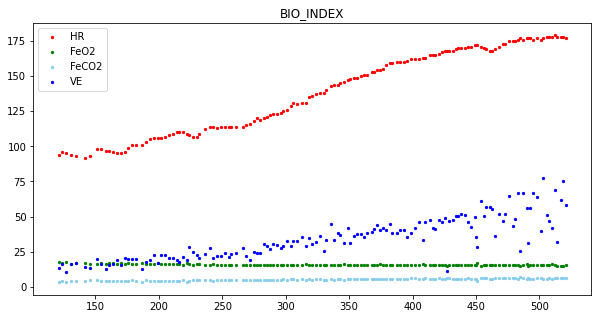

In [18]:
plt.figure(figsize=(10,5))
plt.title('BIO_INDEX')
plt.scatter(time, bio_data.T[0], s=5, color = 'red', label = 'HR')
plt.scatter(time, bio_data.T[1], s=5, color = 'green', label = 'FeO2')
plt.scatter(time, bio_data.T[2], s=5, color = 'skyblue', label = 'FeCO2')
plt.scatter(time, bio_data.T[3], s=5, color = 'blue', label = 'VE')
plt.legend()
plt.show()

In [27]:
class myPCA:
    def __init__(self, data, n_PC, type_s='similar'):
        self.data = data
        self.n_PC = n_PC
        self.type = type_s

    def zero_mean(self):
        data = self.data.T
        mean = np.mean(data, axis=1)
        zero_mean_data = []

        for i in range(data.shape[0]):
            zero_mean_row = data[i] - mean[i]
            zero_mean_data.append(zero_mean_row)

        zero_mean_data = np.array(zero_mean_data).reshape(data.shape[0], data.shape[1]).T

        return zero_mean_data


    def get_matrix(self):
        zero_mean_data = self.zero_mean()

        cov_matrix = np.cov(zero_mean_data.T)


        if self.type == 'homo':
            return cov_matrix

        elif self.type == 'heter':
            cor_matrix = np.corrcoef(zero_mean_data.T)
            return cor_matrix

        else:
            print('please choose "homo" for the same scale data, or "heter" for the different scale data.')


    def get_eigenfactors(self):
        matrix = self.get_matrix()
        eigval, eigvect = np.linalg.eig(matrix)

        eigen_dic = {eigval[i]:eigvect.T[i] for i in range(len(eigval))}
        eigen_dic = sorted(eigen_dic.items(), key=lambda item:item[0], reverse=True)

        eigen_value = np.array([eigen_dic[i][0] for i in range(len(eigen_dic))])
        eigen_vector = np.array([eigen_dic[i][1] for i in range(len(eigen_dic))])

        return eigen_value, eigen_vector


    def get_variance_ratio(self):
        eigen_value, _ = self.get_eigenfactors()
        ratio = np.sum(eigen_value[:self.n_PC])/np.sum(eigen_value)
        print('eigenvalues refer to {}'.format(eigen_value))
        print('your selected {} principle component(PC) represent {}% variance.'.format(self.n_PC, np.round(ratio, 5)*100))

    def get_PC_loading(self):
        _, eigen_vector = self.get_eigenfactors()

        return eigen_vector[:self.n_PC]

    def get_PC(self):
        zero_meam_data = self.zero_mean()
        _, eigen_vector = self.get_eigenfactors()
        PC = np.dot(eigen_vector[:self.n_PC], zero_meam_data.T).T
        PC_of_n_dim = PC

        return PC_of_n_dim

In [28]:
pca = myPCA(bio_data, 2, 'heter')
pca.get_variance_ratio()
PCA_bio_data = pca.get_PC()

eigenvalues refer to [3.33702997 0.50091959 0.13696329 0.02508715]
your selected 2 principle component(PC) represent 95.949% variance.


In [29]:
eigenvec = pca.get_PC_loading()

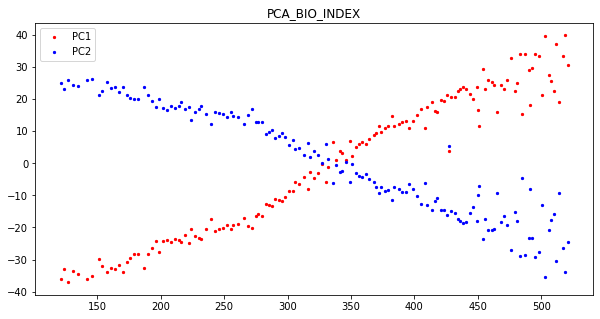

In [22]:
plt.figure(figsize=(10,5))
plt.title('PCA_BIO_INDEX')


plt.scatter(time, PCA_bio_data.T[0], s=5, color = 'red', label = 'PC1')
plt.scatter(time, PCA_bio_data.T[1], s=5, color = 'blue', label = 'PC2')

plt.legend()
plt.show()

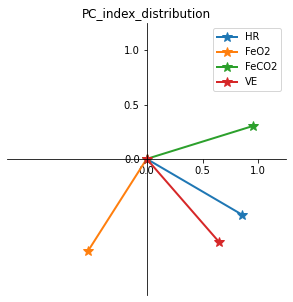

In [23]:
plt.figure(figsize=(5,5))

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])

ax =plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))

eigenvec = eigenvec.T

plt.title('PC_index_distribution')
plt.plot([eigenvec[0][0]/(np.sqrt(eigenvec[0][0]**2+eigenvec[0][1]**2)),0],
         [eigenvec[0][1]/(np.sqrt(eigenvec[0][0]**2+eigenvec[0][1]**2)),0], 
         linewidth=2,
         marker='*', markersize=10,
         label = 'HR') 

plt.plot([eigenvec[1][0]/(np.sqrt(eigenvec[1][0]**2+eigenvec[1][1]**2)),0],
         [eigenvec[1][1]/(np.sqrt(eigenvec[1][0]**2+eigenvec[1][1]**2)),0],
         linewidth=2,
         marker='*', markersize=10,
         label = 'FeO2') 

plt.plot([eigenvec[2][0]/(np.sqrt(eigenvec[2][0]**2+eigenvec[2][1]**2)),0],
         [eigenvec[2][1]/(np.sqrt(eigenvec[2][0]**2+eigenvec[2][1]**2)),0],
         linewidth=2,
         marker='*', markersize=10,
         label = 'FeCO2') 

plt.plot([eigenvec[3][0]/(np.sqrt(eigenvec[3][0]**2+eigenvec[3][1]**2)),0],
         [eigenvec[3][1]/(np.sqrt(eigenvec[3][0]**2+eigenvec[3][1]**2)),0],
         linewidth=2,
         marker='*', markersize=10,
         label = 'VE') 


#plt.plot([0.699,0],[-0.714,0])
plt.legend()
plt.show()